In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df.shape

(344, 7)

In [6]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [9]:
x=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

In [10]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True


In [11]:
y.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [14]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=model.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix


In [17]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[24,  1,  0],
       [ 0, 17,  0],
       [ 0,  0, 25]])

Text(70.72222222222221, 0.5, 'Actual')

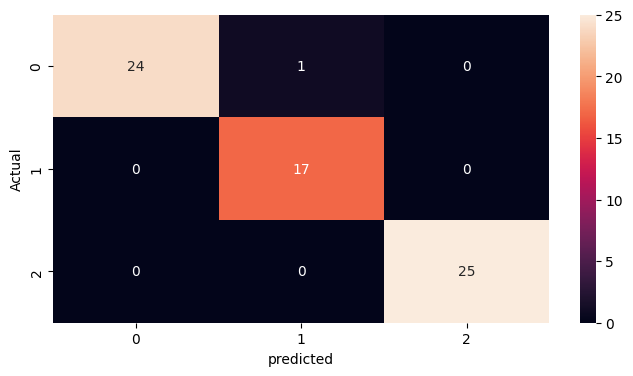

In [18]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        25
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [20]:
from sklearn.tree import plot_tree

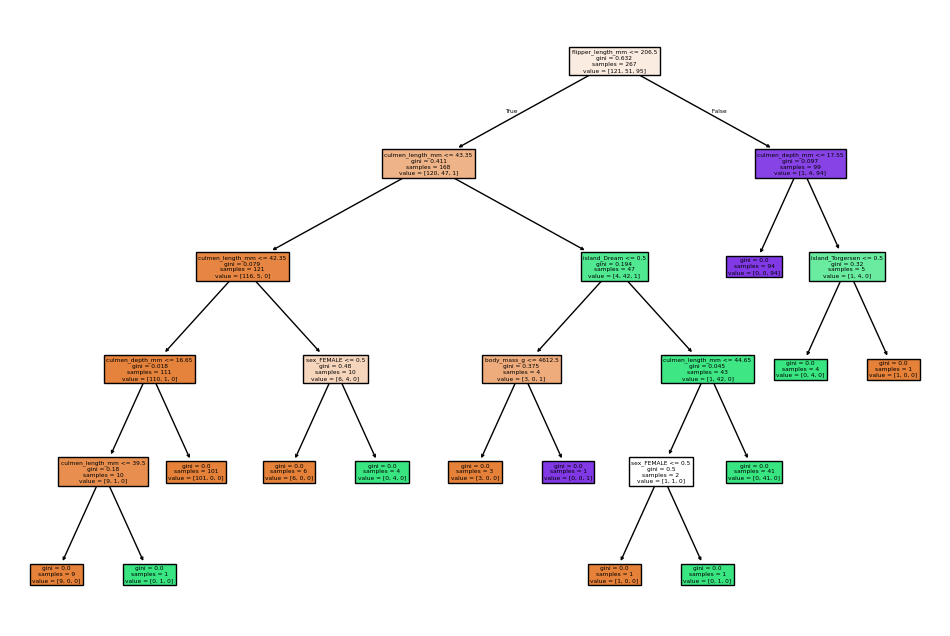

In [21]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=x.columns);